# Content Based Filtering and Recommender System

In [67]:
import numpy as np 
import pandas as pd 
import numpy.ma as ma
import matplotlib.pyplot as plt
from tabulate import tabulate
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
#Importing the Movies Dataset
movies=pd.read_csv("./data/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Importing the Ratings Dataset
ratings=pd.read_csv("./data/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Movie Features dataframe
movie_features=pd.DataFrame()
movie_features.loc[:,'movieId']=movies.loc[:,'movieId']

In [5]:
movie_features

,movieId
0,1
1,2
2,3
3,4
4,5
...,...
9737,193581
9738,193583
9739,193585
9740,193587


In [6]:
#Adding all genres to movieFeature Dataframe
UsefulFeatures=["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
for feature in UsefulFeatures:
    movie_features[f'{feature}']=None

In [7]:
movie_features

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9738,193583,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9739,193585,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9740,193587,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
#Converting genre features to one hot encoding
for feature in UsefulFeatures:
    movie_features[f'{feature}'] = movies['genres'].str.contains(f'{feature}', case=False).astype(int)

In [9]:
movie_features

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9738,193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9739,193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9740,193587,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#Initializing Year column
movie_features["year"]=None
movie_features['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)


In [11]:
movie_features

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1995
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1995
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2017
9738,193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2017
9739,193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2017
9740,193587,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018


In [12]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
#adding mean rating to movieFeatures
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
movie_features = pd.merge(movie_features, mean_ratings, on='movieId', how='left')
movie_features.rename(columns={'rating': 'mean_rating'}, inplace=True)

In [14]:
#Adding ratings count column to movie_features
movie_features.loc[:,"ratings_count"]=ratings.groupby('movieId').size().reset_index(name='ratings_count')["ratings_count"]
movie_features.loc[:,"ratings_count"].fillna(0,inplace=True)

In [15]:
movie_features

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,mean_rating,ratings_count
0,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1995,3.920930,215.0
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1995,3.431818,110.0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1995,3.259615,52.0
3,4,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1995,2.357143,7.0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1995,3.071429,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2017,4.000000,0.0
9738,193583,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2017,3.500000,0.0
9739,193585,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2017,3.500000,0.0
9740,193587,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2018,3.500000,0.0


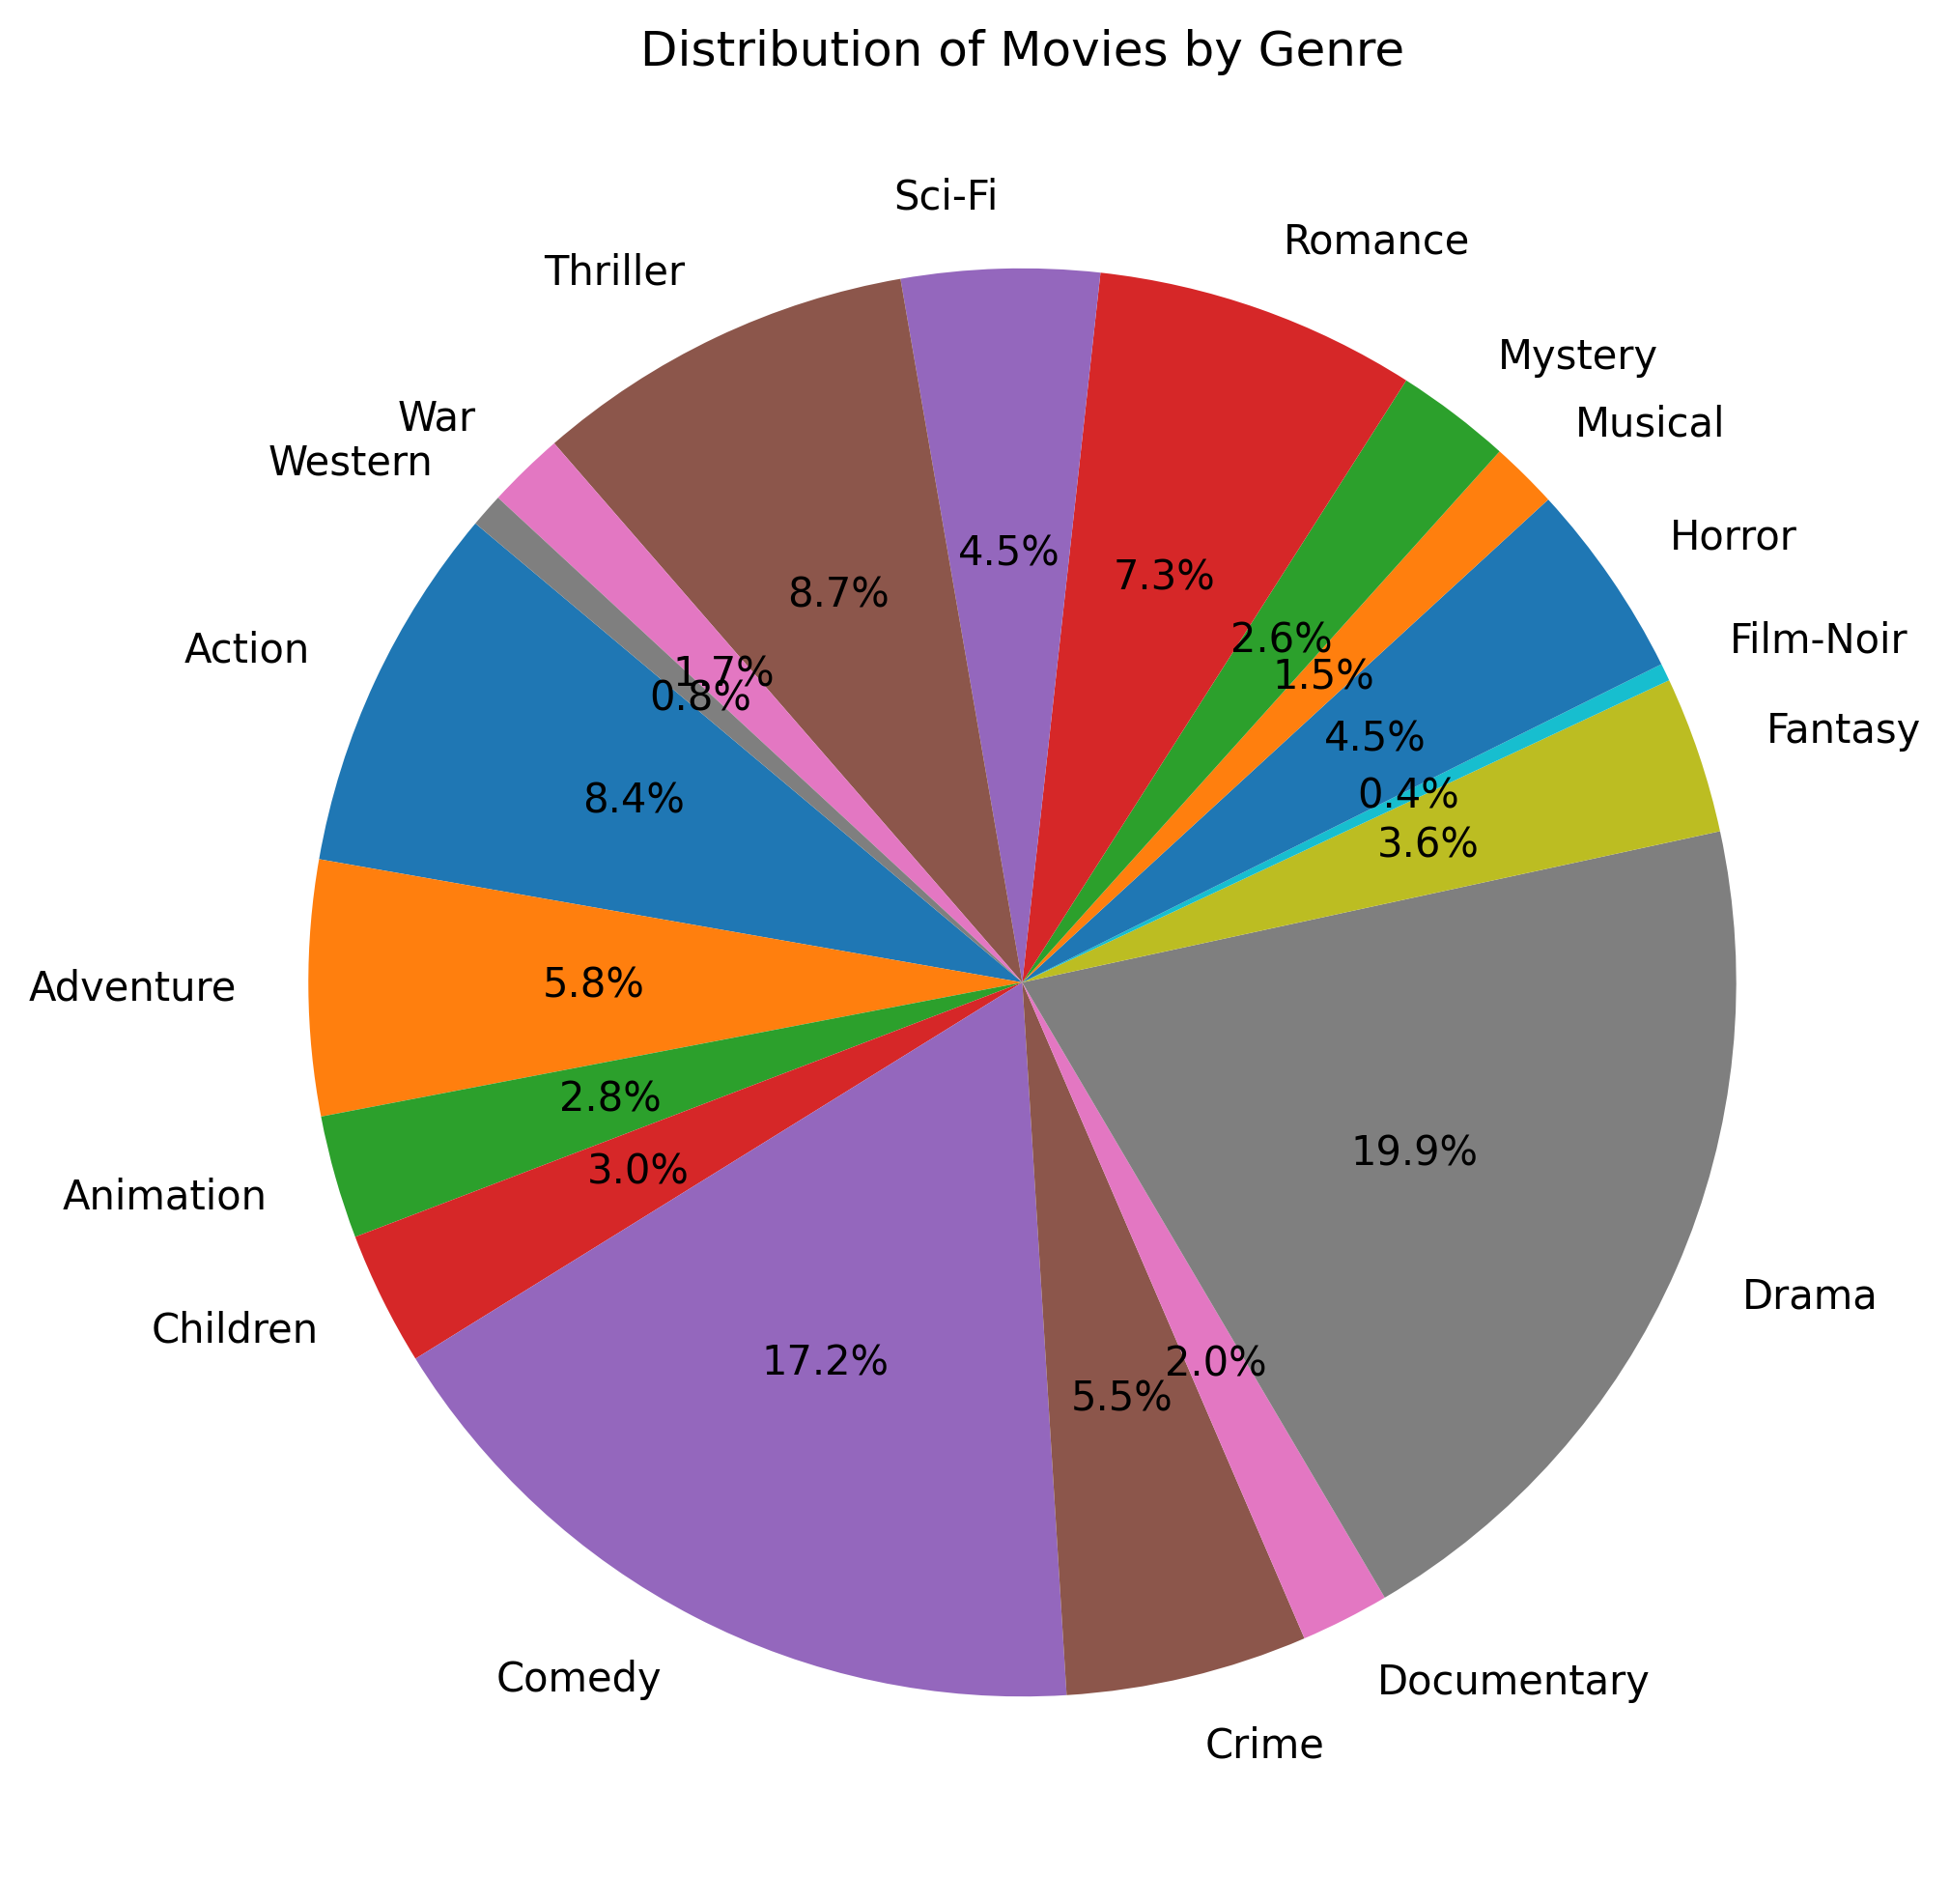

In [16]:
#plotting pie chart of distribution of movies by Genre
genre_counts = movie_features.iloc[:, 1:19].sum()
plt.figure(figsize=(8, 8), dpi=300)
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Genre')
plt.show()

In [17]:
#Calculating Average rating by genre
genre_columns = ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
genre_ratings = movie_features.groupby(genre_columns)['mean_rating'].mean().reset_index()
single_genre_ratings = genre_ratings[genre_ratings[genre_columns].sum(axis=1) == 1]


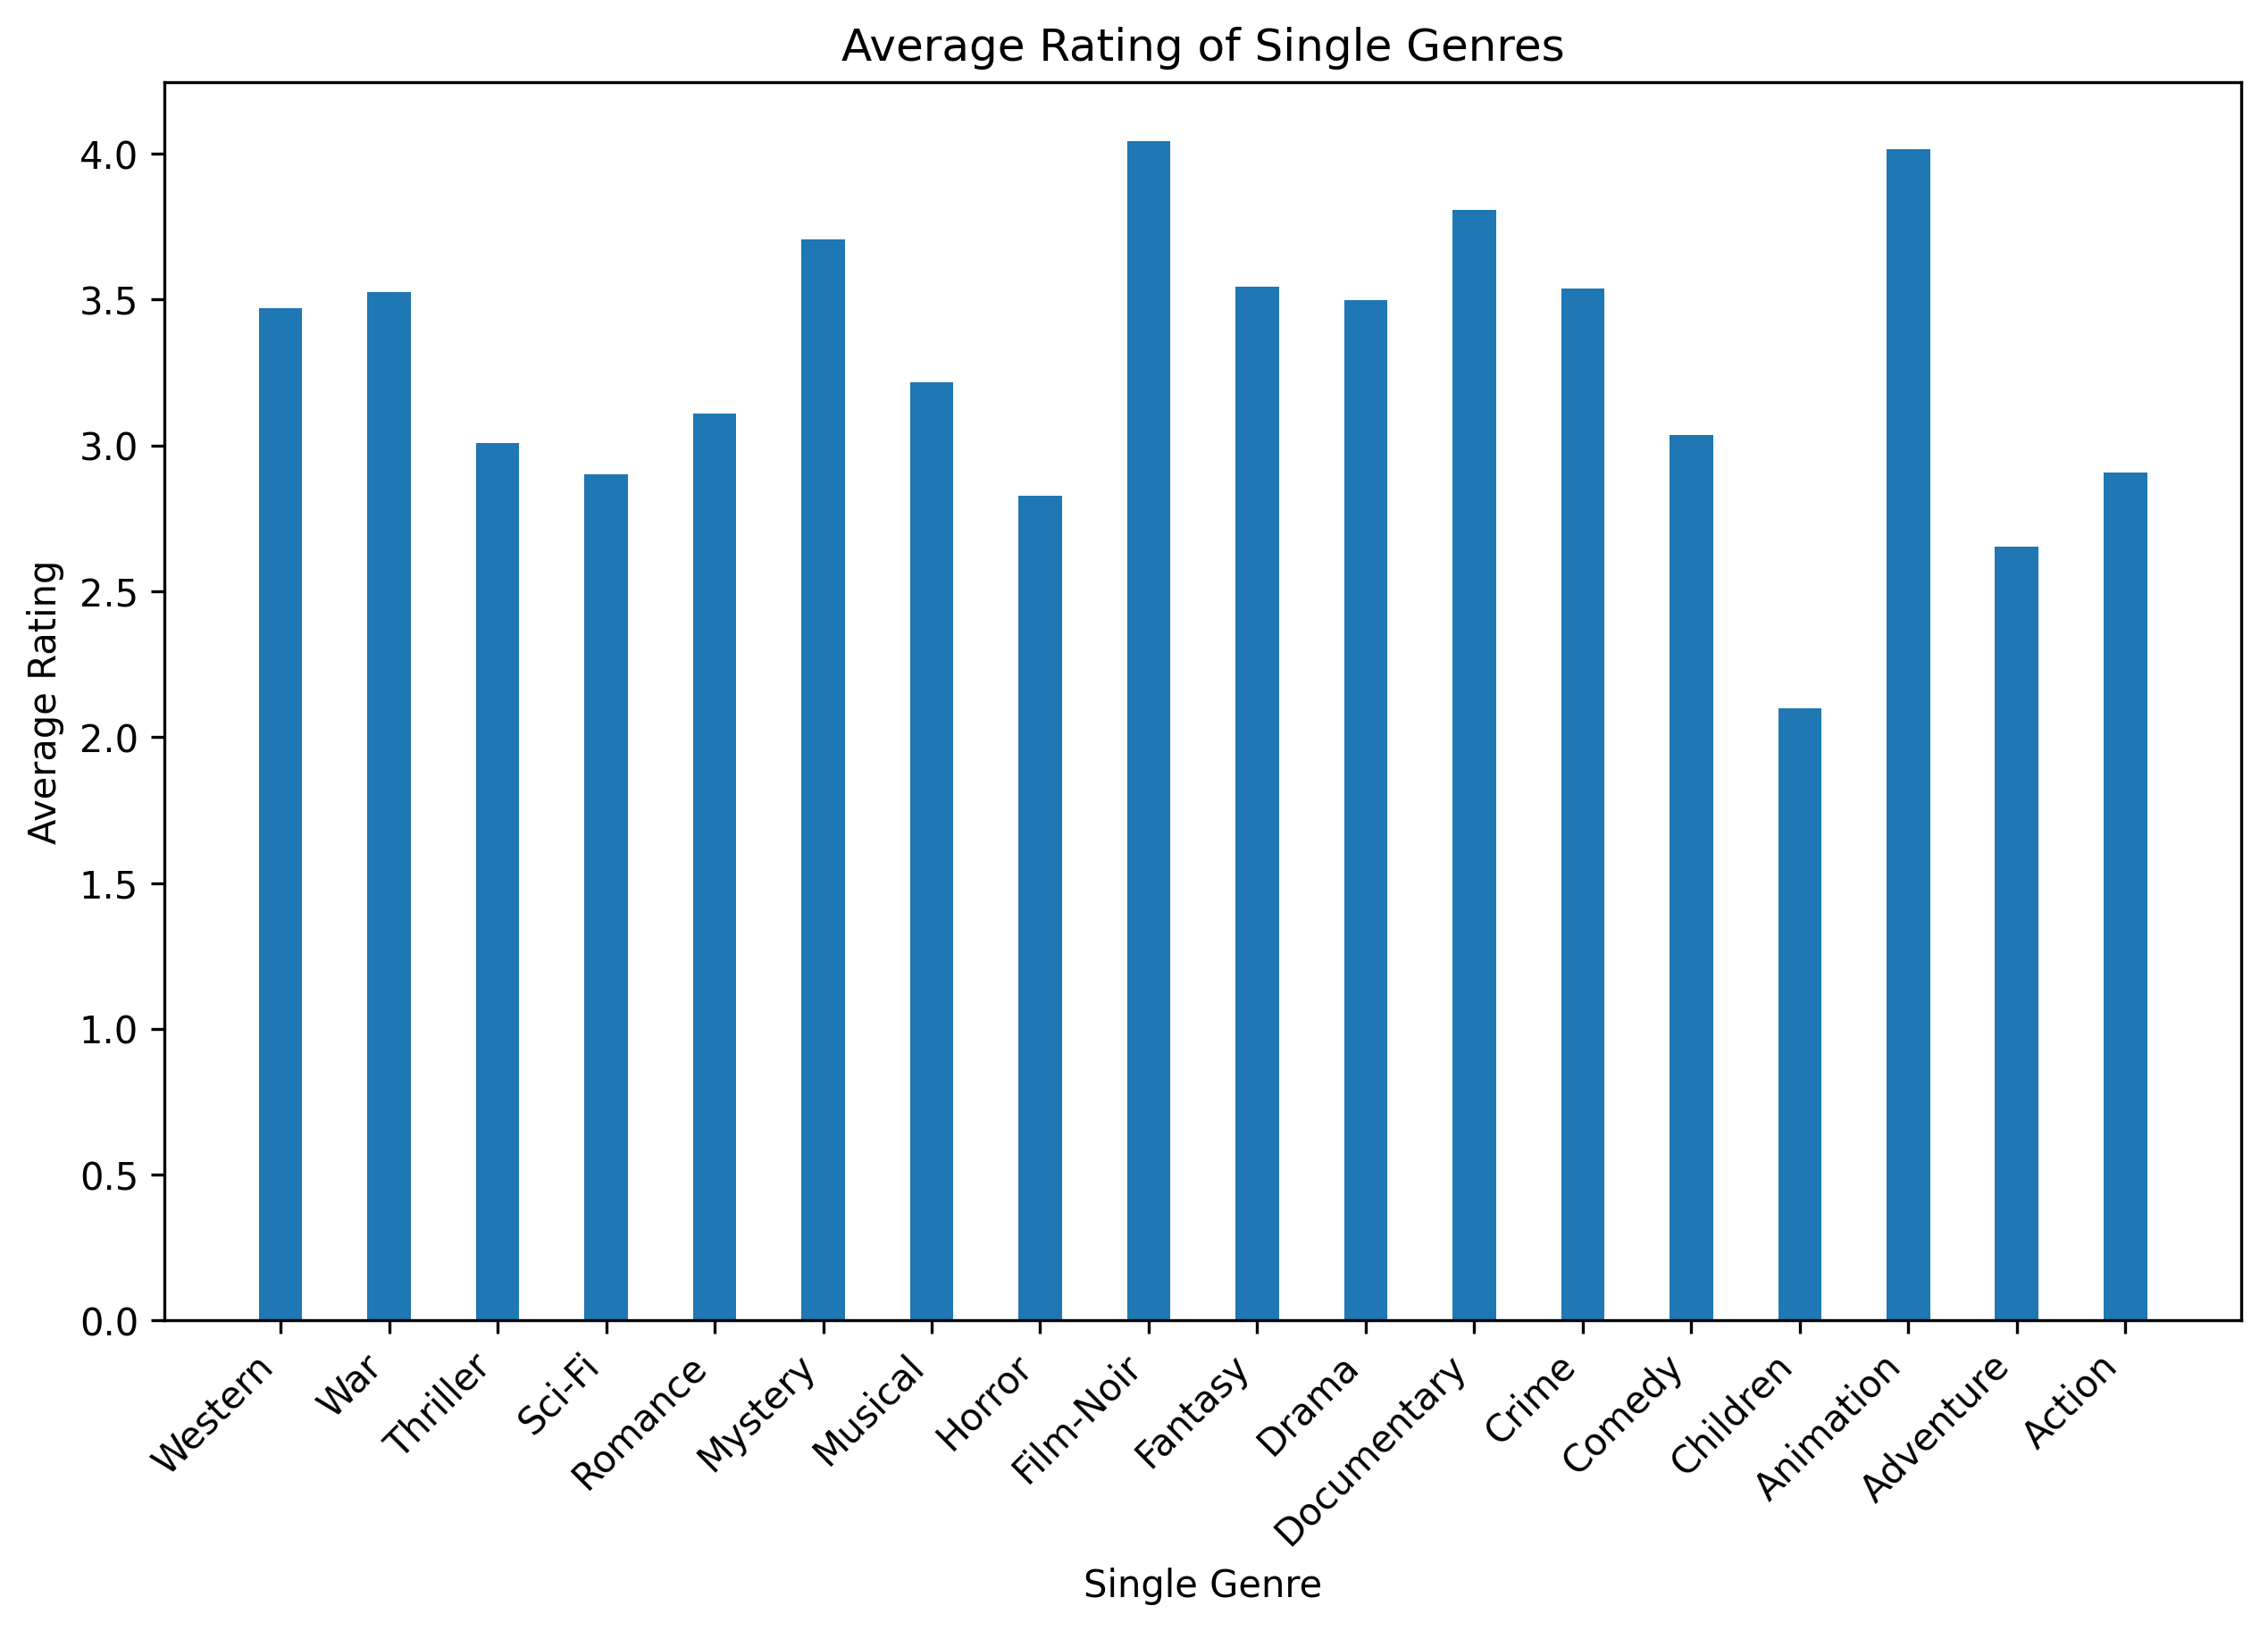

In [18]:
#Plotting bar graph of rating per genre
bar_width = 0.4  
bar_positions = range(len(single_genre_ratings))
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(bar_positions,
        single_genre_ratings['mean_rating'],
        width=bar_width,
        tick_label=single_genre_ratings.apply(lambda row: ', '.join([col for col in genre_columns if row[col] == 1]), axis=1))
plt.xlabel('Single Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating of Single Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
#Creating user_feature dataframe to store information of user and his/her preferences
user_features=pd.DataFrame()
user_features["userId"]=ratings["userId"].unique()
user_features["avg_rating"]=ratings.groupby("userId")["rating"].mean().reset_index()["rating"]
user_features.loc[:,"ratings_count"]=ratings.groupby('userId').size().reset_index(name='ratings_count')["ratings_count"]

In [20]:
user_features

,userId,avg_rating,ratings_count
0,1,4.366379,232
1,2,3.948276,29
2,3,2.435897,39
3,4,3.555556,216
4,5,3.636364,44
...,...,...,...
605,606,3.657399,1115
606,607,3.786096,187
607,608,3.134176,831
608,609,3.270270,37


In [21]:
#merging rating dataframe with movie_features dataframe 
merged_data = pd.merge(ratings, movie_features, on='movieId')
#finding average rating of each user for every genre
for feature in UsefulFeatures:
    merged_data[f"{feature}"]=merged_data[f"{feature}"]*merged_data["rating"]
merged_data=merged_data.replace(0,np.NaN)
merged_data=merged_data.groupby("userId")[UsefulFeatures].mean()
merged_data=merged_data.replace(np.NaN,0)    

In [22]:
merged_data

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,
1,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.000000,4.529412,4.297872,5.0000,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714
2,3.954545,4.166667,0.000000,0.000000,4.000000,3.800000,4.333333,3.882353,0.000000,0.0000,3.000000,0.000000,4.000000,4.500000,3.875000,3.700000,4.500000,3.500000
3,3.571429,2.727273,0.500000,0.500000,1.000000,0.500000,0.000000,0.750000,3.375000,0.0000,4.687500,0.500000,5.000000,0.500000,4.200000,4.142857,0.500000,0.000000
4,3.320000,3.655172,4.000000,3.800000,3.509615,3.814815,4.000000,3.483333,3.684211,4.0000,4.250000,4.000000,3.478261,3.379310,2.833333,3.552632,3.571429,3.800000
5,3.111111,3.250000,4.333333,4.111111,3.466667,3.833333,0.000000,3.800000,4.142857,0.0000,3.000000,4.400000,4.000000,3.090909,2.500000,3.555556,3.333333,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.178808,3.503401,3.714286,3.448980,3.565321,3.654135,3.800000,3.787966,3.597938,3.8125,3.346154,3.727273,3.791209,3.740845,3.556962,3.525126,3.792308,3.411765
607,3.722222,3.466667,3.333333,3.421053,3.327273,3.814815,0.000000,4.012195,3.571429,0.0000,4.114286,3.600000,4.647059,3.517241,3.250000,4.114754,4.166667,4.000000
608,3.330325,3.220994,3.118182,2.460227,2.736620,3.613014,3.000000,3.437500,3.000000,3.7500,3.319588,2.757576,3.550725,2.886792,3.296407,3.536680,3.578947,2.636364


In [23]:
user_features

,userId,avg_rating,ratings_count
0,1,4.366379,232
1,2,3.948276,29
2,3,2.435897,39
3,4,3.555556,216
4,5,3.636364,44
...,...,...,...
605,606,3.657399,1115
606,607,3.786096,187
607,608,3.134176,831
608,609,3.270270,37


In [24]:
#Adding per genre rating of user to user_features
user_features=pd.concat([merged_data,user_features.set_index("userId")],axis=1)
user_features.reset_index(inplace=True)

In [25]:
user_features

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,ratings_count
0,1,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.000000,4.529412,4.297872,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
1,2,3.954545,4.166667,0.000000,0.000000,4.000000,3.800000,4.333333,3.882353,0.000000,...,3.000000,0.000000,4.000000,4.500000,3.875000,3.700000,4.500000,3.500000,3.948276,29
2,3,3.571429,2.727273,0.500000,0.500000,1.000000,0.500000,0.000000,0.750000,3.375000,...,4.687500,0.500000,5.000000,0.500000,4.200000,4.142857,0.500000,0.000000,2.435897,39
3,4,3.320000,3.655172,4.000000,3.800000,3.509615,3.814815,4.000000,3.483333,3.684211,...,4.250000,4.000000,3.478261,3.379310,2.833333,3.552632,3.571429,3.800000,3.555556,216
4,5,3.111111,3.250000,4.333333,4.111111,3.466667,3.833333,0.000000,3.800000,4.142857,...,3.000000,4.400000,4.000000,3.090909,2.500000,3.555556,3.333333,3.000000,3.636364,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,3.178808,3.503401,3.714286,3.448980,3.565321,3.654135,3.800000,3.787966,3.597938,...,3.346154,3.727273,3.791209,3.740845,3.556962,3.525126,3.792308,3.411765,3.657399,1115
606,607,3.722222,3.466667,3.333333,3.421053,3.327273,3.814815,0.000000,4.012195,3.571429,...,4.114286,3.600000,4.647059,3.517241,3.250000,4.114754,4.166667,4.000000,3.786096,187
607,608,3.330325,3.220994,3.118182,2.460227,2.736620,3.613014,3.000000,3.437500,3.000000,...,3.319588,2.757576,3.550725,2.886792,3.296407,3.536680,3.578947,2.636364,3.134176,831
608,609,3.090909,3.200000,3.000000,3.000000,3.285714,3.500000,3.000000,3.368421,3.000000,...,3.500000,0.000000,0.000000,3.200000,3.000000,3.285714,3.500000,4.000000,3.270270,37


In [26]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [27]:
ratings.drop('timestamp',axis=1,inplace=True)

In [28]:
#Mapping each user to each movie he/she has rated
userFeature=pd.merge(ratings,user_features,on="userId")
userFeature=userFeature.sort_values(by=["userId","movieId"],ascending=True)
userFeature.reset_index(drop=True,inplace=True)

In [29]:
userFeature

,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,ratings_count
0,1,1,4.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.0,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
1,1,3,4.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.0,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
2,1,6,4.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.0,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
3,1,47,5.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.0,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
4,1,50,5.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,0.0,...,3.470588,4.681818,4.166667,4.307692,4.225000,4.145455,4.500000,4.285714,4.366379,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,3.600580,3.705993,3.901515,3.651786,3.731144,3.800366,4.2,...,3.506601,3.928571,3.766667,3.731092,3.659363,3.573529,3.776596,3.742424,3.688556,1302
100832,610,168248,5.0,3.600580,3.705993,3.901515,3.651786,3.731144,3.800366,4.2,...,3.506601,3.928571,3.766667,3.731092,3.659363,3.573529,3.776596,3.742424,3.688556,1302
100833,610,168250,5.0,3.600580,3.705993,3.901515,3.651786,3.731144,3.800366,4.2,...,3.506601,3.928571,3.766667,3.731092,3.659363,3.573529,3.776596,3.742424,3.688556,1302
100834,610,168252,5.0,3.600580,3.705993,3.901515,3.651786,3.731144,3.800366,4.2,...,3.506601,3.928571,3.766667,3.731092,3.659363,3.573529,3.776596,3.742424,3.688556,1302


In [30]:
#mapping each movie to each user who has rated it
movieFeature=pd.merge(ratings,movie_features,on="movieId")
movieFeature=movieFeature.sort_values(by=["userId","movieId"],ascending=True)
movieFeature.reset_index(drop=True,inplace=True)

In [31]:
movieFeature

,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,mean_rating,ratings_count
0,1,1,4.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3.920930,215.0
1,1,3,4.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,3.259615,52.0
2,1,6,4.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1995,3.946078,102.0
3,1,47,5.0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1995,3.975369,203.0
4,1,50,5.0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1995,4.237745,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2017,3.333333,7.0
100832,610,168248,5.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2017,4.142857,1.0
100833,610,168250,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,3.633333,1.0
100834,610,168252,5.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2017,4.280000,1.0


In [32]:
y_train=userFeature.rating.values

In [33]:
y_train

array([4., 4., 4., ..., 5., 5., 3.])

In [34]:
user_train=userFeature.iloc[:,3:22].values

In [35]:
user_train

array([[4.32222222, 4.38823529, 4.68965517, ..., 4.5       , 4.28571429,
        4.36637931],
       [4.32222222, 4.38823529, 4.68965517, ..., 4.5       , 4.28571429,
        4.36637931],
       [4.32222222, 4.38823529, 4.68965517, ..., 4.5       , 4.28571429,
        4.36637931],
       ...,
       [3.60058027, 3.70599251, 3.90151515, ..., 3.77659574, 3.74242424,
        3.68855607],
       [3.60058027, 3.70599251, 3.90151515, ..., 3.77659574, 3.74242424,
        3.68855607],
       [3.60058027, 3.70599251, 3.90151515, ..., 3.77659574, 3.74242424,
        3.68855607]])

In [36]:
movieId=movieFeature.movieId

In [37]:
movie_train=movieFeature.iloc[:,3:21].values

In [38]:
movie_train

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [39]:
#Feature Scaling of data
scalerMovie = StandardScaler()
scalerMovie.fit(movie_train)
movie_train = scalerMovie.transform(movie_train)

scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))


In [40]:
#Splitting data into training and testing
movie_train, movie_test = train_test_split(movie_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
movieId_train,movieId_test = train_test_split(movieId,    train_size=0.80, shuffle=True, random_state=1)

In [41]:
movie_train.shape

(80668, 18)

In [42]:
user_train.shape

(80668, 19)

In [43]:
num_outputs = 32 #this is the number of features each movies and user will have
tf.random.set_seed(1)
#Creating user Neural network
user_NN = tf.keras.models.Sequential([
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(num_outputs)
    

])
#Creating movie Neural network
movie_NN = tf.keras.models.Sequential([   
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(num_outputs)  
])
#Defining the input layer of user NN
input_user = tf.keras.layers.Input(shape=(None, 19))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

#Defining the input layer of movie NN
input_movie = tf.keras.layers.Input(shape=(None, 18))
vm = movie_NN(input_movie)
vm = tf.linalg.l2_normalize(vm, axis=1)

#The dot product of user and movie output features will predict the rating
output = tf.keras.layers.Dot(axes=1)([vu, vm])
#Defining the model
model = tf.keras.Model([input_user, input_movie], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 19)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 18)]   0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 32)     42144       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, None, 32)     41888       ['input_2[0][0]']                
                                                                                              

In [44]:
#Setting up the model
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss=cost_fn)

In [45]:
#Training the model
tf.random.set_seed(1)
model.fit([user_train, movie_train], y_train, epochs=30)

Epoch 1/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1704
Epoch 2/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1645
Epoch 3/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1620
Epoch 4/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1588
Epoch 5/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1572
Epoch 6/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1563
Epoch 7/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1554
Epoch 8/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1548
Epoch 9/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1534
Epoch 10/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1527
Epoch 11/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1520
Epoch 12/30
2521/2521 [==============================] - 3s 1ms/step - loss: 0.1515
E

In [46]:
#Model evalulation using test data
model.evaluate([user_test, movie_test], y_test)

631/631 [==============================] - 1s 639us/step - loss: 0.1548


0.15478451550006866

In [47]:
#Prediction of test data
test_prediction=model.predict([user_test,movie_test])
test_prediction_rescaled = scalerTarget.inverse_transform(test_prediction)
y_test_rescaled = scalerTarget.inverse_transform(y_test)
movieId_test=pd.DataFrame(movieId_test)
result_test=movieId_test.merge(movies,on='movieId',how='left')

631/631 [==============================] - 0s 562us/step


In [48]:
result_test

,movieId,title,genres
0,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
1,103688,"Conjuring, The (2013)",Horror|Thriller
2,149902,Garm Wars: The Last Druid (2014),Action|Sci-Fi|Thriller
3,1183,"English Patient, The (1996)",Drama|Romance|War
4,1982,Halloween (1978),Horror
...,...,...,...
20163,69436,Year One (2009),Adventure|Comedy
20164,5991,Chicago (2002),Comedy|Crime|Drama|Musical
20165,3052,Dogma (1999),Adventure|Comedy|Fantasy
20166,2605,Entrapment (1999),Crime|Thriller


In [49]:
#setting up test prediction dataframe
result_test["prediction"]=test_prediction_rescaled
result_test["Rating"]=y_test_rescaled
result_test=result_test.sort_values(by='prediction',ascending=False).drop_duplicates()

In [50]:
result_test.head(15)

,movieId,title,genres,prediction,Rating
6566,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.900791,5.0
196,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,4.858970,5.0
13508,904,Rear Window (1954),Mystery|Thriller,4.858315,5.0
15270,2890,Three Kings (1999),Action|Adventure|Comedy|Drama|War,4.857403,4.5
8844,1262,"Great Escape, The (1963)",Action|Adventure|Drama|War,4.836299,4.5
16539,1222,Full Metal Jacket (1987),Drama|War,4.821649,4.5
3852,198,Strange Days (1995),Action|Crime|Drama|Mystery|Sci-Fi|Thriller,4.819979,2.0
18450,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.818259,5.0
15839,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.813298,4.0
5922,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.808476,5.0


In [51]:
#Making new user recommendation
Action = 0.0
Adventure = 0.0
Animation = 5.0
Children = 4.0
Comedy = 5.0
Crime = 0.0
Documentary = 0.0
Drama = 0.0
Fantasy = 5.0
Film_Noir = 0.0
Horror = 0.0
Musical = 0.0
Mystery = 0.0
Romance = 0.0
Sci_Fi = 0.0
Thriller = 0.0
War = 0.0
Western = 0.0
avg_rating = 4

newUser = np.array([[Action, Adventure, Animation,Children, Comedy, Crime, Documentary
                    , Drama, Fantasy,Film_Noir, Horror, Musical, Mystery, Romance, Sci_Fi
                    ,Thriller, War, Western, avg_rating]])

In [52]:
newUser=np.tile(newUser,(user_train.shape[0],1))

In [53]:
newUser

array([[0., 0., 5., ..., 0., 0., 4.],
       [0., 0., 5., ..., 0., 0., 4.],
       [0., 0., 5., ..., 0., 0., 4.],
       ...,
       [0., 0., 5., ..., 0., 0., 4.],
       [0., 0., 5., ..., 0., 0., 4.],
       [0., 0., 5., ..., 0., 0., 4.]])

In [54]:
#scaling of user
newUser_scaled = scalerUser.transform(newUser)
#Predicting movie ratings
preds = model.predict([newUser_scaled, movie_train])
preds_rescaled = scalerTarget.inverse_transform(preds)

2521/2521 [==============================] - 1s 566us/step


In [55]:
movieId_train=pd.DataFrame(movieId_train)
movieId_train.reset_index(drop=True,inplace=True)

In [56]:
#Creating result dataframe
result=movieId_train.merge(movies,on='movieId',how='left')
result["prediction"]=preds_rescaled
result=result.sort_values(by='prediction',ascending=False).drop_duplicates()
result.reset_index(drop=True,inplace=True)

In [57]:
result

,movieId,title,genres,prediction
0,1920,Small Soldiers (1998),Animation|Children|Fantasy|War,4.421827
1,4709,Paint Your Wagon (1969),Comedy|Musical|Western,4.383941
2,37211,Go West (1940),Comedy|Musical|Western,4.383941
3,5375,"Harvey Girls, The (1946)",Comedy|Musical|Western,4.383941
4,5613,8 Women (2002),Comedy|Crime|Musical|Mystery,4.344690
...,...,...,...,...
8966,87520,Transformers: Dark of the Moon (2011),Action|Adventure|Sci-Fi|War|IMAX,1.384429
8967,39400,"Fog, The (2005)",Action|Horror|Mystery|Thriller,1.313993
8968,5065,"Mothman Prophecies, The (2002)",Drama|Fantasy|Horror|Mystery|Thriller,1.308016
8969,130050,Digging Up the Marrow (2014),Drama|Fantasy|Horror|Mystery|Thriller,1.308016


In [58]:
# Similar Items
input_movie_sim = tf.keras.layers.Input(shape=(None, 18))
#Using the previous movie Neural network to generate features
vm_sim = movie_NN(input_movie_sim)                                    
vm_sim = tf.linalg.l2_normalize(vm_sim, axis=1)                       
model_sim = tf.keras.Model(input_movie_sim, vm_sim)                                
model_sim.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 18)]        0         
                                                                 
 sequential_1 (Sequential)   (None, None, 32)          41888     
                                                                 
 tf.math.l2_normalize_2 (TFO  (None, None, 32)         0         
 pLambda)                                                        
                                                                 
Total params: 41,888
Trainable params: 41,888
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Selecting 1000 movies to choose from
movie_sim=movie_train[:1000]
movieId_sim=movieId_train.values[:1000,0]

In [60]:
#Predicting the movie ratings
vm_s=model_sim.predict(movie_sim)

32/32 [==============================] - 0s 595us/step


In [61]:
#Showing <count> Similar movies
count = 15
dim = len(vm_s)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = np.linalg.norm(vm_s[i, :]-vm_s[j, :])
        
masked_dist = ma.masked_array(dist, mask=np.identity(dist.shape[0]))  

In [62]:
#Creating the similar movies array
sim_array = np.empty((count, 2))
for i in range(count):
    min_idx = np.argmin(masked_dist[i])
    movie1_id = movieId_sim[i]
    movie2_id = movieId_sim[min_idx]
    sim_array[i,0]=movie1_id
    sim_array[i,1]=movie2_id
sim_df=pd.DataFrame(sim_array,columns=["movieId","Similar_movieId"])

In [63]:
sim_df

,movieId,Similar_movieId
0,3827.0,1527.0
1,1639.0,4246.0
2,5349.0,52722.0
3,3793.0,5378.0
4,3821.0,141.0
5,31696.0,95207.0
6,1270.0,33004.0
7,5463.0,1587.0
8,95167.0,95167.0
9,6776.0,914.0


In [64]:
sim_df=sim_df.merge(movies,on='movieId',how='left')
sim_df=sim_df.rename(columns={"title":"Movie_title","genres":"Movie_genres"})
sim_df=sim_df[["movieId","Movie_title","Movie_genres","Similar_movieId"]]

In [65]:
sim_df=pd.merge(sim_df, movies, left_on='Similar_movieId',right_on='movieId').drop("movieId_y",axis=1)
sim_df=sim_df.rename(columns={"movieId_x":"movieId","title":"Similar_movie_title","genres":"Similar_movie_genres"})

In [66]:
sim_df

,movieId,Movie_title,Movie_genres,Similar_movieId,Similar_movie_title,Similar_movie_genres
0,3827.0,Space Cowboys (2000),Action|Adventure|Comedy|Sci-Fi,1527.0,"Fifth Element, The (1997)",Action|Adventure|Comedy|Sci-Fi
1,1639.0,Chasing Amy (1997),Comedy|Drama|Romance,4246.0,Bridget Jones's Diary (2001),Comedy|Drama|Romance
2,5349.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,52722.0,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX
3,3793.0,X-Men (2000),Action|Adventure|Sci-Fi,5378.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
4,3821.0,Nutty Professor II: The Klumps (2000),Comedy,141.0,"Birdcage, The (1996)",Comedy
5,31696.0,Constantine (2005),Action|Fantasy|Horror|Thriller,95207.0,Abraham Lincoln: Vampire Hunter (2012),Action|Fantasy|Horror|Thriller
6,1270.0,Back to the Future (1985),Adventure|Comedy|Sci-Fi,33004.0,"Hitchhiker's Guide to the Galaxy, The (2005)",Adventure|Comedy|Sci-Fi
7,5463.0,Reign of Fire (2002),Action|Adventure|Fantasy,1587.0,Conan the Barbarian (1982),Action|Adventure|Fantasy
8,95167.0,Brave (2012),Action|Adventure|Animation|Children,95167.0,Brave (2012),Action|Adventure|Animation|Children
9,6776.0,Lagaan: Once Upon a Time in India (2001),Comedy|Drama|Musical|Romance,914.0,My Fair Lady (1964),Comedy|Drama|Musical|Romance
